# Model training

#### BTC-USDT for ROR_n24 with price action features


<br>

#### Performance by Model ID

```
model_id: 7764ba619949bad96eae8f48cc4f0cc673af7bee
    - n_estimates = 100
    - max_depth = 10
    - Mean Absolute Error:	 0.02534
    - Mean Absolute Outcome:	 0.02999
    - Mean Absolute Percent Error:	 0.84501
    - Error Variance:	 0.00142
    - R-Squared:		 0.27244

```


```
model_id: 286c8f533ecdc2563101afbcb5b49e33c1103266
    - max_depth=20
    - Mean Absolute Error:	 0.02554
    - Mean Absolute Outcome:	 0.02999
    - Mean Absolute Percent Error:	 0.85149
    - Error Variance:	 0.00147
    - R-Squared:		 0.24567
```


```
model_id: b23eb573457cf3a715cf9cb79455d9b0e86fb50a
    - max_depth = 30
    - Mean Absolute Error:	 0.0257
    - Mean Absolute Outcome:	 0.02999
    - Mean Absolute Percent Error:	 0.85714
    - Error Variance:	 0.00148
    - R-Squared:		 0.24101
```

<br>

#### Resources
+ [BigQuery](https://console.cloud.google.com/bigquery?folder=&organizationId=&project=algomosaic-nyc)
+ [Storage](https://console.cloud.google.com/storage/browser/algom-trading/models/?project=algomosaic-nyc)



<br> 

#### Requirements


In [29]:
import numpy as np
from algom import configs
from algom.utils.data_object import dataObject
from algom.model_regression import modelRegression
from algom.model_plots import modelPlots

<br>

### Load training data


In [30]:
# Load model data
data = dataObject("""
with

ticker_data as (
  select
    ticker_time,
    ticker_time_sec,
    ticker,
    `interval` as ticker_interval,
    ROR_n6,
    ROR_n12,
    ROR_n24,
    ROR_n48,
    ROR_n72,
    ROR_n96,
    ROR_n120,
    ROR_n144,
    ROR_n168,
    volume_base,
    volume,
    open as open1,
    high as high1,
    low as low1,
    close as close1,
    rank() over (partition by ticker_time order by etl_time desc) as load_rank,
  from `algom-trading.cryptocompare.features_BTC_USD_hour_2020`
  )

select *,
  round(log(safe_divide(close1, open6)), 5) as open_close1,
  round(log(safe_divide(high1, open6)), 5)  as open_high1,
  round(log(safe_divide(low1, open6)), 5)   as open_low1,

  round(log(safe_divide(close2, open6)), 5) as open_close2,
  round(log(safe_divide(high2, open6)), 5)  as open_high2,
  round(log(safe_divide(low2, open6)), 5)   as open_low2,

  round(log(safe_divide(close3, open6)), 5) as open_close3,
  round(log(safe_divide(high3, open6)), 5)  as open_high3,
  round(log(safe_divide(low3, open6)), 5)   as open_low3,

  round(log(safe_divide(close4, open6)), 5) as open_close4,
  round(log(safe_divide(high4, open6)), 5)  as open_high4,
  round(log(safe_divide(low4, open6)), 5)   as open_low4,

  round(log(safe_divide(close5, open6)), 5) as open_close5,
  round(log(safe_divide(high5, open6)), 5)  as open_high5,
  round(log(safe_divide(low5, open6)), 5)   as open_low5,

  round(log(safe_divide(close6, open6)), 5) as open_close6,
  round(log(safe_divide(high6, open6)), 5)  as open_high6,
  round(log(safe_divide(low6, open6)), 5)   as open_low6,

from (
    select * except(load_rank),

    lag(open1) over (order by ticker_time)  as open2,
    lag(high1) over (order by ticker_time)  as high2,
    lag(low1) over (order by ticker_time)   as low2,
    lag(close1) over (order by ticker_time) as close2,

    lag(open1, 2) over (order by ticker_time)  as open3,
    lag(high1, 2) over (order by ticker_time)  as high3,
    lag(low1, 2) over (order by ticker_time)   as low3,
    lag(close1, 2) over (order by ticker_time) as close3,

    lag(open1, 3) over (order by ticker_time)  as open4,
    lag(high1, 3) over (order by ticker_time)  as high4,
    lag(low1, 3) over (order by ticker_time)   as low4,
    lag(close1, 3) over (order by ticker_time) as close4,

    lag(open1, 4) over (order by ticker_time)  as open5,
    lag(high1, 4) over (order by ticker_time)  as high5,
    lag(low1, 4) over (order by ticker_time)   as low5,
    lag(close1, 4) over (order by ticker_time) as close5,

    lag(open1, 5) over (order by ticker_time)  as open6,
    lag(high1, 5) over (order by ticker_time)  as high6,
    lag(low1, 5) over (order by ticker_time)   as low6,
    lag(close1, 5) over (order by ticker_time) as close6,

    from ticker_data
    where load_rank = 1
    )
where close6 is not null
order by ticker_time
""")


RUNNING: Querying SQL script.


Downloading: 100%|██████████| 8604/8604 [00:05<00:00, 1687.72rows/s]

SUCCESS: Loaded SQL query.


In [31]:
# Drop nan values
data.df = data.df.replace([np.inf, -np.inf], np.nan).dropna()
print(len(data.df))
data.df.head()

8441


,ticker_time,ticker_time_sec,ticker,ticker_interval,ROR_n6,ROR_n12,ROR_n24,ROR_n48,ROR_n72,ROR_n96,...,open_low3,open_close4,open_high4,open_low4,open_close5,open_high5,open_low5,open_close6,open_high6,open_low6
163,2019-11-18 08:00:00+00:00,1574064000,BTC-USD,hour,0.002803,-0.007048,-0.010658,-0.001109,-0.016153,-0.013862,...,-0.00124,0.00390,0.00498,0.00207,0.00262,0.00550,0.00188,0.00353,0.00393,-0.00257
164,2019-11-18 09:00:00+00:00,1574067600,BTC-USD,hour,-0.000504,-0.008857,-0.007972,-0.002562,-0.013127,-0.016154,...,-0.00674,-0.00347,0.00185,-0.00477,0.00037,0.00145,-0.00146,-0.00091,0.00197,-0.00165
165,2019-11-18 10:00:00+00:00,1574071200,BTC-USD,hour,-0.000784,-0.008691,-0.007902,-0.000164,-0.019610,-0.016775,...,-0.00406,-0.00307,-0.00001,-0.00583,-0.00257,0.00276,-0.00387,0.00127,0.00235,-0.00055
166,2019-11-18 11:00:00+00:00,1574074800,BTC-USD,hour,-0.006130,-0.008014,-0.011580,-0.004561,-0.021164,-0.020955,...,-0.00393,-0.00110,0.00109,-0.00533,-0.00434,-0.00129,-0.00711,-0.00384,0.00149,-0.00514
167,2019-11-18 12:00:00+00:00,1574078400,BTC-USD,hour,-0.006150,-0.012650,-0.019518,-0.008060,-0.029475,-0.024134,...,-0.00010,0.00297,0.00334,-0.00009,0.00275,0.00493,-0.00149,-0.00050,0.00256,-0.00327


<br>

### Initialize modelRegression class

In [32]:
# Initialize model class
model = modelRegression(
    data, 
    outcome='ROR_n24',
    model_id='7764ba619949bad96eae8f48cc4f0cc673af7bee',
    index_features=configs.INDEX_FEATURES, 
    omit_features=configs.OMIT_FEATURES
)

SUCCESS: Loaded dataObject.
SUCCESS: Model 7764ba619949bad96eae8f48cc4f0cc673af7bee has been loaded successfully.
Downloaded file from GCS to: /home/jovyan/algomosaic/data/models/20210102_GradientBoostingRegressor_7764ba619949bad96eae8f48cc4f0cc673af7bee.pickle
Initialized model. As a next step, run self.predict() or self.train().


In [33]:
# len(model.feature_list)
# list(model.feature_list)


In [36]:
# Train model
model.predict()


TypeError: predict() got an unexpected keyword argument 'to_bq'

In [35]:
# Model IDs
print('model_id: ' + model.model_id)
print('model_execution_id: ' + model.model_execution_id)


model_id: 7764ba619949bad96eae8f48cc4f0cc673af7bee
model_execution_id: 9fe28d40d3878f5ad126230a293d13eedd071191


<br>

## View performance 

+ Trending predictions vs outcomes
+ Histogram of predictions vs outcomes


In [22]:
start_date='2020-02-01'
end_date='2020-02-07'
%matplotlib inline
model_plot = modelPlots(model)

PLOT: Predictions by Date
        `self.plot_predictions_by_date(start_date, end_date)`


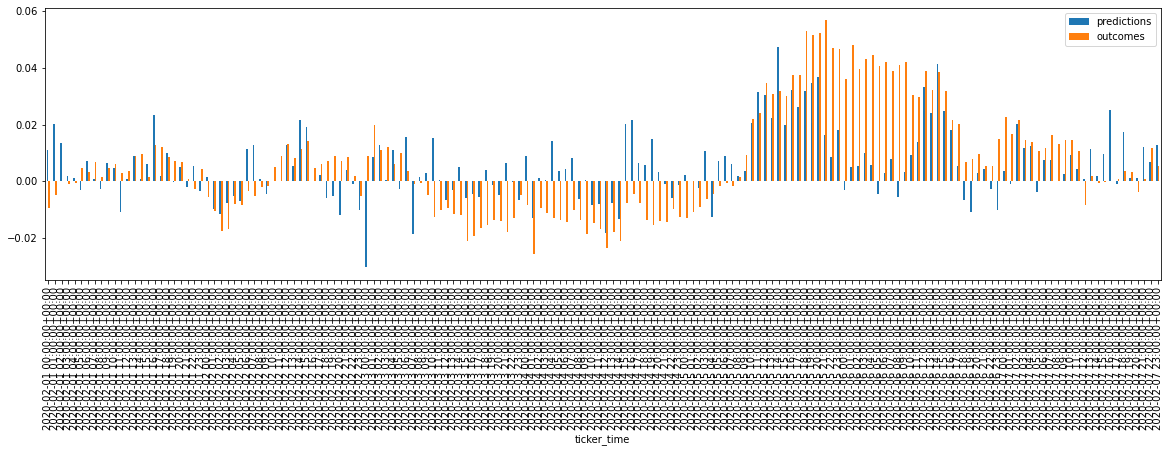

In [23]:
model_plot.plot_predictions_by_date(start_date, end_date)

PLOT: Prediction Errors by Date`


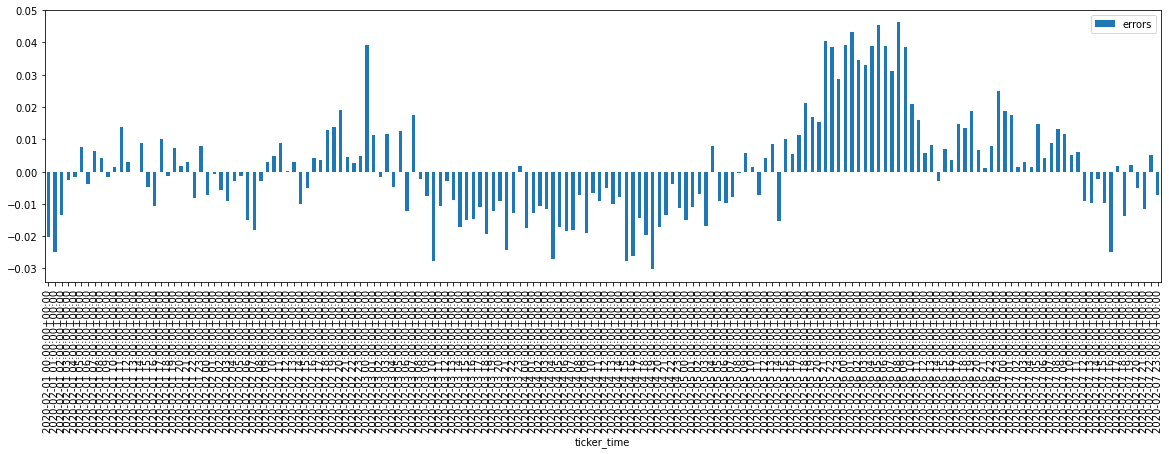

In [24]:
model_plot.plot_errors_by_date(start_date, end_date)

PLOT: Predictions Histogram


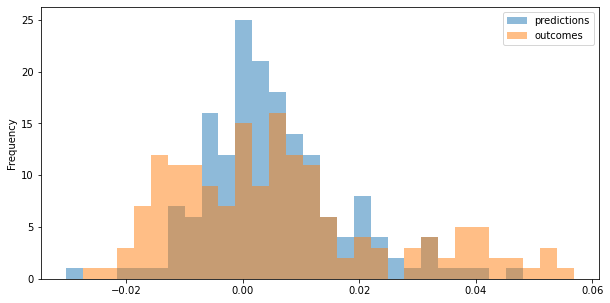

In [25]:
model_plot.plot_predictions_histogram(start_date, end_date)

PLOT: Predictions Histogram


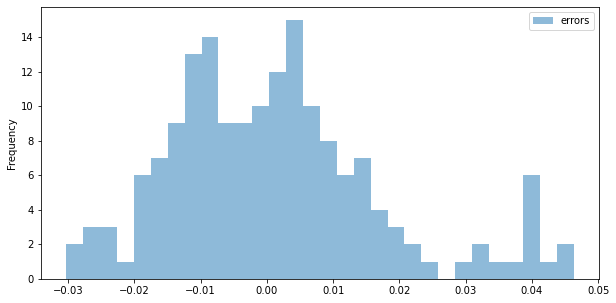

In [26]:
model_plot.plot_errors_histogram(start_date, end_date)


PLOT: Predictions by Date


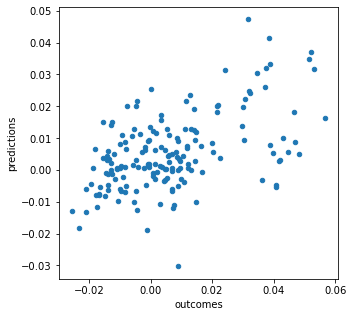

In [27]:
model_plot.plot_predictions_scatterplot(start_date, end_date)

<br>

### View trending features


In [28]:
start_date = '2016-01-01'
end_date = '2017-01-01'
%matplotlib inline 

# from data_mgmt import data_mgmt as dm

model_plot.plot_features(
    df = model.df, 
    x = 'ticker_time', 
    y = 'ROR_n10',
    start_date=start_date, 
    end_date=end_date
)

AttributeError: 'modelPlots' object has no attribute 'plot_features'

In [ ]:
model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'ATR_7',
    start_date=start_date, end_date=end_date, chart_type = 'line')

model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'EMA_20',
    start_date=start_date, end_date=end_date, chart_type='line')
